In [1]:
from competing_methods.estimators import competing_estimators
from data_loader import data_loader_
from utils.utils_ import data_stats

from prettytable import PrettyTable
import numpy as np
import pandas as pd

/Users/acsi/Working/RF_survival/Implementations/venv3.9/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
R[write to console]: Le chargement a nécessité le package : nlme

R[write to console]: Le chargement a nécessité le package : survival



/Users/acsi/Working/RF_survival/Implementations/wildwood_survival/wildwood_survival


R[write to console]: Le chargement a nécessité le package : doParallel

R[write to console]: Le chargement a nécessité le package : foreach

R[write to console]: Le chargement a nécessité le package : iterators

R[write to console]: Le chargement a nécessité le package : parallel

R[write to console]: Le chargement a nécessité le package : rstan

R[write to console]: Le chargement a nécessité le package : StanHeaders

R[write to console]: Le chargement a nécessité le package : ggplot2

R[write to console]: rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

R[write to console]: For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



# 1. Data analysis

## Data loading ##

In [2]:
data_list = ["GBSG", "PBCSeq", "simple_simulated_data", "linear_simulated_data", "non_linear_simulated_data"]
datas = data_loader_.load_data(data_list)

## Simulated data

### Simple simulated data

- Dataset is simulated with simple setting

First five observations 
          f0        f1  delta       time
0  3.913431 -3.520114      1  26.257240
1  4.082009 -2.714783      1  34.195766
2  4.808361 -2.209437      1  29.601724
3  6.206976 -2.560513      1  29.029687
4  4.493611 -2.176092      1  34.998874 

Shape of the data  (100, 4) 

Level of censoring is  0.0 % 

Data type 
 f0       float64
f1       float64
delta     uint16
time     float64
dtype: object 

Histogram of randomly selected features


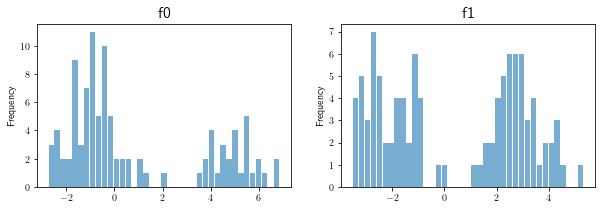

Survival curves


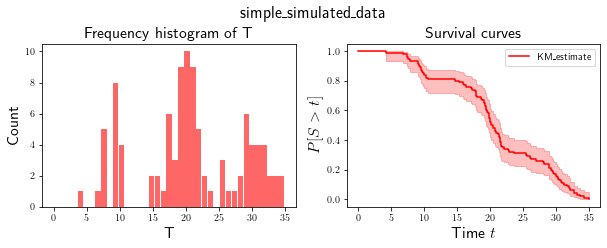

In [3]:
data_name = 'simple_simulated_data'
data_stats(datas, data_name)

### Linear simulated data

- Simulated dataset with the survival time T is sampled according to an exponential Cox model in which the regression term in form linear function.

First five observations 
          f0        f1        f2        f3        f4        f5        f6  \
0  0.992179 -0.560890  0.474831  0.083731  0.841454 -0.485648 -0.268600   
1  0.907947  0.059210 -0.933487 -0.326814  0.644247  0.434109  0.923202   
2  0.773858 -0.378411 -0.625807 -0.836263 -0.489470  0.421766 -0.887077   
3 -0.887055  0.444774  0.170252  0.528846  0.267029  0.904368  0.567246   
4  0.562196 -0.120820 -0.823362  0.275214 -0.857608 -0.597362 -0.699825   

         f7        f8        f9  ...       f42       f43       f44       f45  \
0  0.313994  0.290177 -0.177289  ...  0.313410 -0.668779 -0.138848 -0.220726   
1  0.661002 -0.051159  0.004736  ... -0.851141  0.203909  0.083325 -0.793568   
2  0.997526  0.775473  0.108947  ...  0.732509  0.558514 -0.691861 -0.137617   
3 -0.505856 -0.834634  0.170596  ... -0.645809  0.806993  0.551142  0.309213   
4  0.740674 -0.809395 -0.654343  ... -0.979770  0.051754  0.131933  0.180259   

        f46       f47       f48       f49 

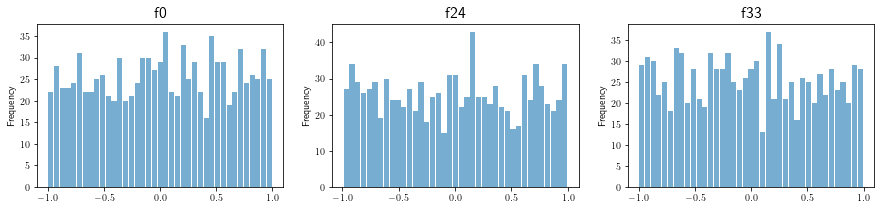

Survival curves


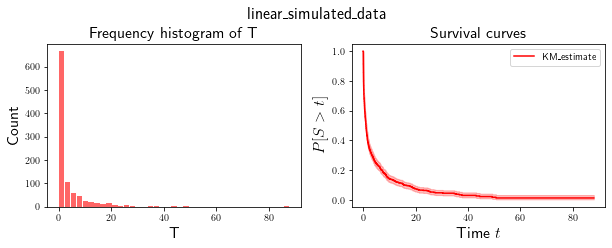

In [4]:
data_name = 'linear_simulated_data'
data_stats(datas, data_name)

### Non linear simulated data

- Simulated dataset with the survival time T is sampled according to an exponential Cox model in which the regression term in form exponential function.

First five observations 
          f0        f1        f2        f3        f4        f5        f6  \
0 -0.125933  0.807905 -0.936605 -0.231562 -0.181914 -0.090949  0.490131   
1  0.230998 -0.020753 -0.379677 -0.258374 -0.091561 -0.142984 -0.071915   
2  0.160343 -0.607926  0.912231  0.608607 -0.348372 -0.511996  0.825617   
3  0.016922  0.059721 -0.797476 -0.537186 -0.361137  0.988906 -0.123206   
4  0.575779 -0.304374  0.272982 -0.832832 -0.530055 -0.712040 -0.310548   

         f7        f8        f9  ...       f42       f43       f44       f45  \
0 -0.402651 -0.885800  0.731963  ... -0.789798  0.043348  0.663996 -0.342387   
1  0.375015 -0.853529 -0.190239  ... -0.902579 -0.037678  0.819411  0.757583   
2 -0.944295  0.625399  0.468653  ...  0.458234 -0.441820  0.799943  0.050415   
3  0.866476  0.927110  0.320139  ...  0.749286  0.696500  0.756248 -0.184345   
4  0.484103 -0.357675 -0.971482  ...  0.674158  0.826197  0.947073  0.347048   

        f46       f47       f48       f49 

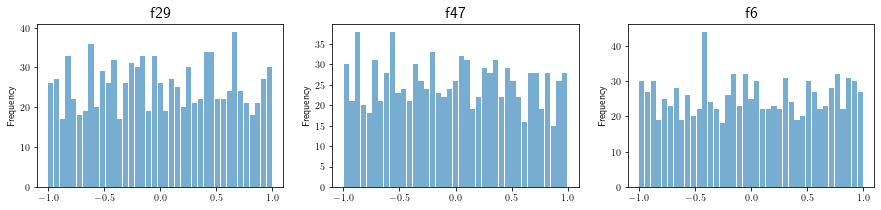

Survival curves


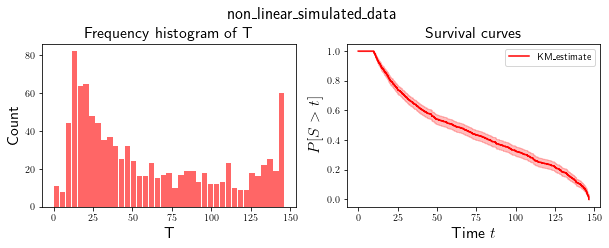

In [5]:
data_name = 'non_linear_simulated_data'
data_stats(datas, data_name)

## Real data

### Mayo Clinic Primary Biliary Cirrhosis

First five observations 
     drug        age  sex  delta       time
0    2.0  58.766838  2.0      1   1.095170
2    2.0  56.447815  2.0      0  14.152338
11   2.0  70.074472  1.0      1   2.770781
15   2.0  54.742087  2.0      1   5.270507
22   1.0  38.106451  2.0      0   4.120578 

Shape of the data  (312, 5) 

Level of censoring is  55.1 % 

Data type 
 drug     float64
age      float64
sex      float64
delta     uint16
time     float64
dtype: object 

Histogram of randomly selected features


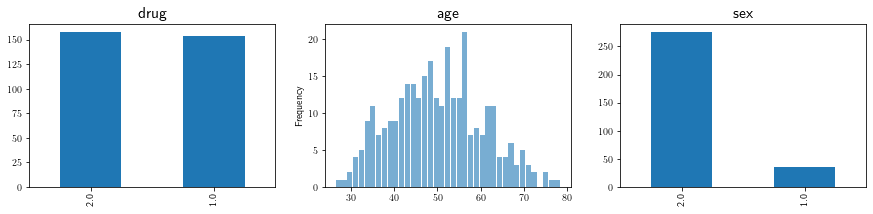

Survival curves


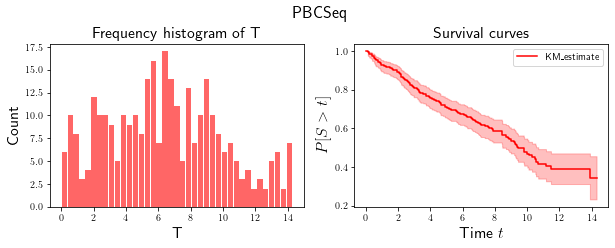

In [6]:
data_name = 'PBCSeq'
data_stats(datas, data_name)

### German Breast Cancer Study Group

First five observations 
     age  estrec  horTh=yes  menostat=Post  pnodes  progrec  tgrade  tsize  \
0  70.0    66.0        0.0            1.0     3.0     48.0       2   21.0   
1  56.0    77.0        1.0            1.0     7.0     61.0       2   12.0   
2  58.0   271.0        1.0            1.0     9.0     52.0       2   35.0   
3  59.0    29.0        1.0            1.0     4.0     60.0       2   17.0   
4  73.0    65.0        0.0            1.0     1.0     26.0       2   35.0   

   delta    time  
0      1  1814.0  
1      1  2018.0  
2      1   712.0  
3      1  1807.0  
4      1   772.0   

Shape of the data  (686, 10) 

Level of censoring is  56.4 % 

Data type 
 age              float64
estrec           float64
horTh=yes        float64
menostat=Post    float64
pnodes           float64
progrec          float64
tgrade             int64
tsize            float64
delta             uint16
time             float64
dtype: object 

Histogram of randomly selected features


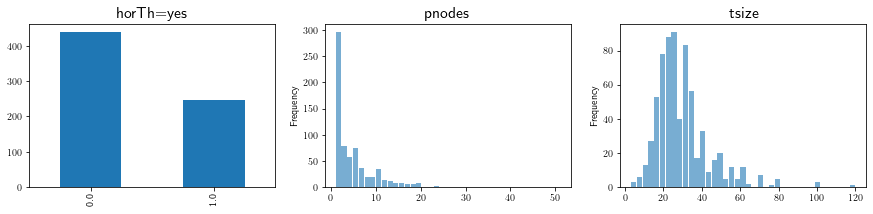

Survival curves


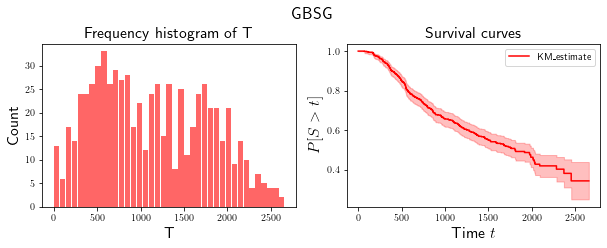

In [7]:
data_name = 'GBSG'
data_stats(datas, data_name)

## 2. Modeling

### Modeling

In [8]:

pt = PrettyTable(['Data', 'Algos', 'C_index', 'time'])
# data loading
# TODO: Not support linear simulated data yet.
data_list = ["GBSG", "PBCSeq", "simple_simulated_data", "non_linear_simulated_data"]
datas = data_loader_.load_data(data_list)
# list of estimator's names
estimators_name = ["SurvivalTree", "RSF", "GBSA", "Cox_PH", "XGBoost"]
# params for estimator
tree_params = {
               "max_depth" : 2, 
               "min_samples_leaf" : 10,
               "n_estimators" : 10
              }
xgboost_params = {'objective': 'survival:aft',
                  'eval_metric': 'aft-nloglik',
                  'aft_loss_distribution': 'normal',
                  'aft_loss_distribution_scale': 1.20,
                  'tree_method': 'hist', 'learning_rate': 0.05,
                  'max_depth': 2}
estimators = competing_estimators(estimators_name, tree_params, xgboost_params)
for data in data_list:
    (X, y) = datas[data]
    perf_stats = estimators.fit(X, y)
    idx = 0
    for name, (score, running_time) in perf_stats.items():
        if idx == (len(estimators_name) // 2):
            pt.add_row([data, name, "%.3f" % score, "%.3f" % running_time])
        else:
            pt.add_row(["", name, "%.3f" % score, "%.3f" % running_time])
        idx += 1
    pt.add_row(["", "", "", ""])

print(pt)

[0]	train-aft-nloglik:8.22677
[1]	train-aft-nloglik:7.48820
[2]	train-aft-nloglik:6.81998
[3]	train-aft-nloglik:6.21552
[4]	train-aft-nloglik:5.66881
[0]	train-aft-nloglik:1.27526
[1]	train-aft-nloglik:1.19659
[2]	train-aft-nloglik:1.12593
[3]	train-aft-nloglik:1.06243
[4]	train-aft-nloglik:1.00534


/Users/acsi/Working/RF_survival/Implementations/venv3.9/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/acsi/Working/RF_survival/Implementations/venv3.9/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-aft-nloglik:6.24684
[1]	train-aft-nloglik:5.72582
[2]	train-aft-nloglik:5.25153
[3]	train-aft-nloglik:4.81956
[4]	train-aft-nloglik:4.42595
[0]	train-aft-nloglik:7.17475
[1]	train-aft-nloglik:6.56749
[2]	train-aft-nloglik:6.01734
[3]	train-aft-nloglik:5.51985
[4]	train-aft-nloglik:5.06916
+---------------------------+--------------+---------+--------+
|            Data           |    Algos     | C_index |  time  |
+---------------------------+--------------+---------+--------+
|                           | SurvivalTree |  0.650  | 0.043  |
|                           |     RSF      |  0.870  | 0.149  |
|            GBSG           |     GBSA     |  0.719  | 0.059  |
|                           |    Cox_PH    |  0.688  | 0.114  |
|                           |   XGBoost    |  0.500  | 0.023  |
|                           |              |         |        |
|                           | SurvivalTree |  0.637  | 0.007  |
|                           |     RSF      |  0.789  | 0.038